# Description 
This dataset highlights the most listened-to songs on Spotify across different countries. It includes rankings of tracks based on streaming data, showcasing listening preferences and musical trends globally. Each entry typically contains details such as the country, song title, artist, number of streams, and chart position. The dataset can be used to analyze regional differences in music taste, identify globally trending artists, or track how local cultures influence musical popularity. Ideal for music industry research, data visualization projects, or building recommendation systems.

In [216]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [217]:
spotify_data = pd.read_csv("/Users/dhanrajtentu/Downloads/Projects/Spotify/spotify_history.csv")


In [218]:
df = spotify_data.copy()

In [219]:
spotify_data.sample(10)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
44218,0COiZ7ncho2yi4HotbzgPv,2018-08-14 22:43:26,android,6247,Motion Picture Soundtrack,Radiohead,Kid A,fwdbtn,fwdbtn,True,False
126810,0FQLQfuCKSlcVSOPscqCJ6,2022-10-26 23:45:37,android,614266,The Return of the King (feat. Sir James Galway...,Howard Shore,The Lord of the Rings: The Return of the King,trackdone,trackdone,False,False
2754,62p6fF2r4NY6pwZbxxvmr8,2015-10-28 13:58:53,android,40681,Fool in the Rain - 1990 Remaster,Led Zeppelin,In Through the out Door,fwdbtn,fwdbtn,True,True
62656,1xa66kvw6zwboiW7c8W9t8,2019-11-02 21:48:55,android,140266,Bob Dylan's Blues,Bob Dylan,The Freewheelin' Bob Dylan,trackdone,trackdone,True,False
54007,5hMA0vhvm20GDIn5OyfJz7,2019-06-02 04:59:54,android,125200,Cascos Ligeros,Alejandro Fernández,Piel De Niña,fwdbtn,trackdone,True,False
83558,7LRlsrrX3IT7nyLUz1fT94,2020-10-23 18:17:54,android,198773,Artificial Flowers,Bobby Darin,The Ultimate Bobby Darin,trackdone,trackdone,True,False
21484,59RpnSj9D7LG1Yo1LVjzF5,2017-07-18 20:22:47,android,4669,Head Held High - 2015 Remaster,The Velvet Underground,Loaded,fwdbtn,fwdbtn,True,False
89550,086myS9r57YsLbJpU0TgK9,2020-12-23 01:05:30,android,721,Why'd You Only Call Me When You're High?,Arctic Monkeys,AM,fwdbtn,fwdbtn,True,False
135068,2CxTkdvhDuQrOxl8xXkdJS,2023-06-24 20:35:40,android,988,Every Little Thing - Remastered 2009,The Beatles,Beatles For Sale - Remastered,fwdbtn,fwdbtn,True,True
56667,1dxbAIfCASqv6jix2R1Taj,2019-08-07 21:44:46,android,148413,Your Mother Should Know - Remastered 2009,The Beatles,Magical Mystery Tour,trackdone,trackdone,True,False


In [220]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [221]:
spotify_data.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [222]:
spotify_data.isna().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [223]:
df = spotify_data.copy()

In [224]:
df['ts'] = pd.to_datetime(df['ts'])

In [225]:
df = df.drop('ts', axis=1)

In [226]:
# Fill null value
df['reason_end'].fillna('Unknown', inplace=True)
df['reason_start'].fillna('Unknown', inplace=True)

In [227]:
df.isna().sum()

spotify_track_uri    0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

# 🗡️ Data Visualisation

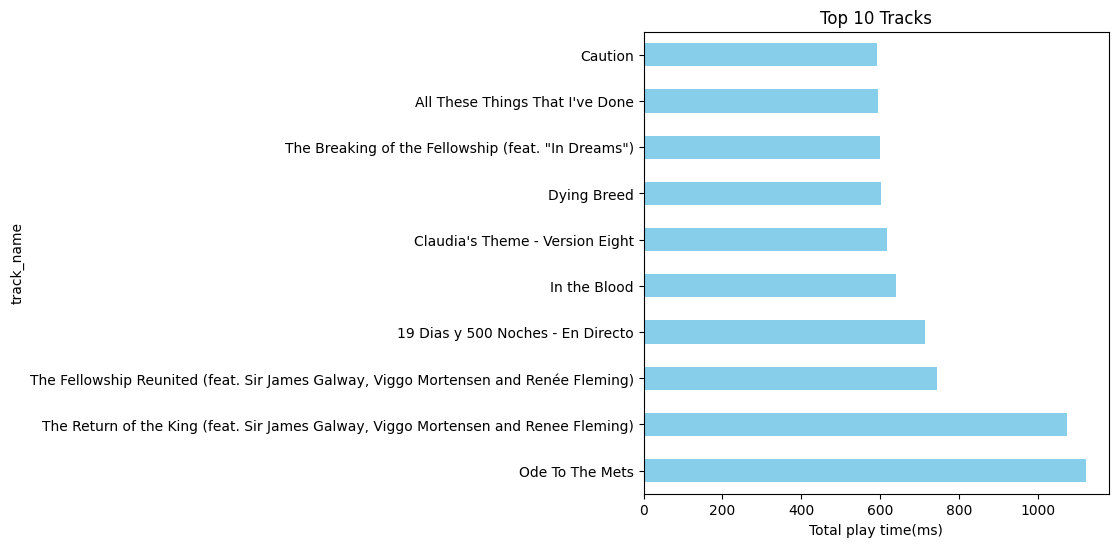

In [228]:
# Top Tracks
top_tracks = df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_tracks = top_tracks /1000/60
top_tracks.plot(kind='barh', figsize=(6,6), color='skyblue')
plt.title("Top 10 Tracks")
plt.xlabel('Total play time(ms)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'total Play time in Minutes')

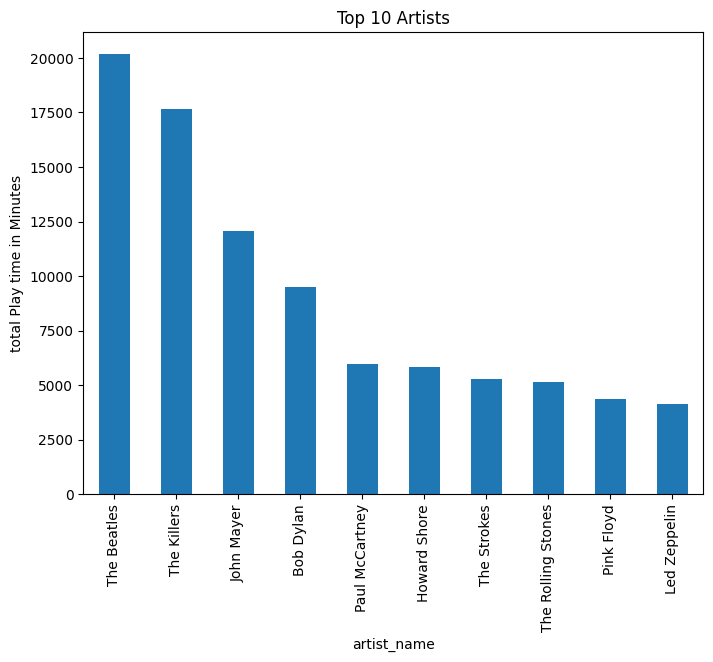

In [229]:
top_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artists = top_artists /1000/60
top_artists.plot(kind='bar', figsize=(8,6))
plt.title("Top 10 Artists")
plt.ylabel('total Play time in Minutes')

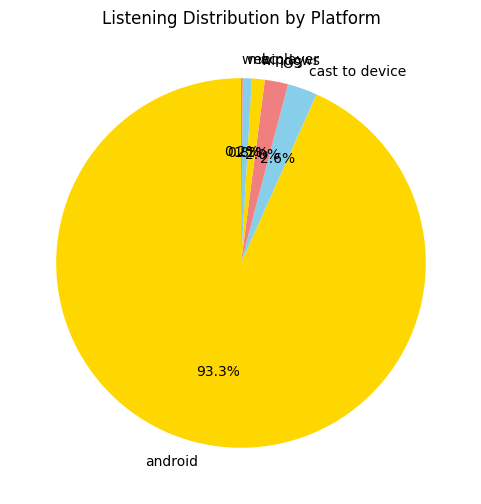

In [230]:
platform_usage = df['platform'].value_counts()

platform_usage.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['gold', 'skyblue', 'lightcoral'])
plt.title('Listening Distribution by Platform')
plt.ylabel('')
plt.show()

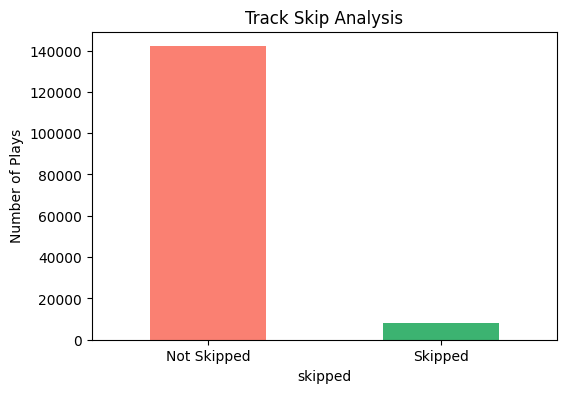

In [231]:
skipped_counts = df['skipped'].value_counts()

skipped_counts.plot(kind='bar', color=['salmon', 'mediumseagreen'], figsize=(6,4))
plt.xticks([0,1], ['Not Skipped', 'Skipped'], rotation=0)
plt.ylabel('Number of Plays')
plt.title('Track Skip Analysis')
plt.show()


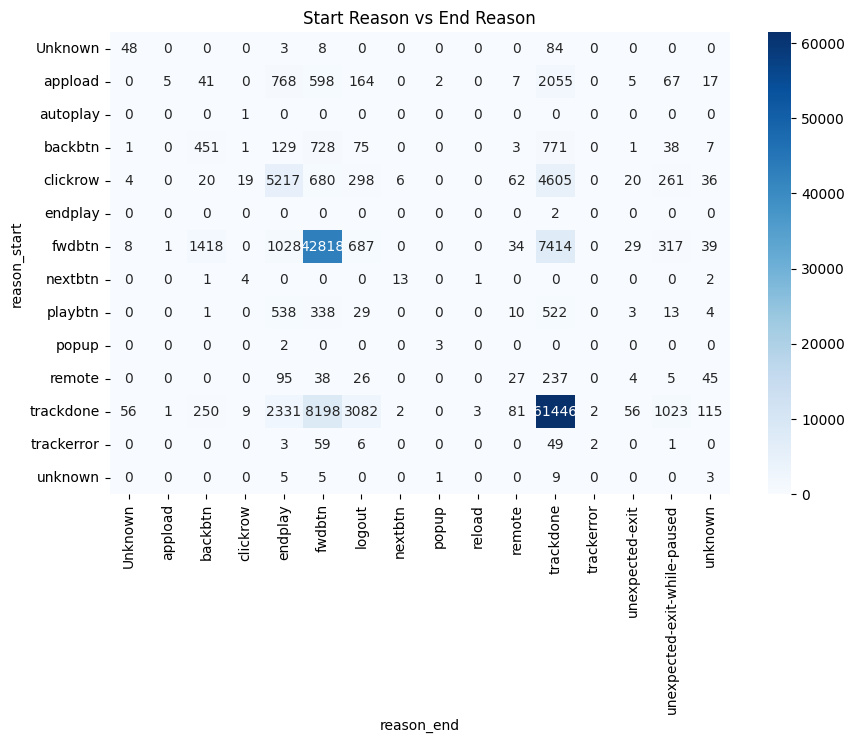

In [232]:
start_end = pd.crosstab(df['reason_start'], df['reason_end'])
plt.figure(figsize=(10,6))
sns.heatmap(start_end, annot=True, fmt='d', cmap='Blues')
plt.title('Start Reason vs End Reason')
plt.show()

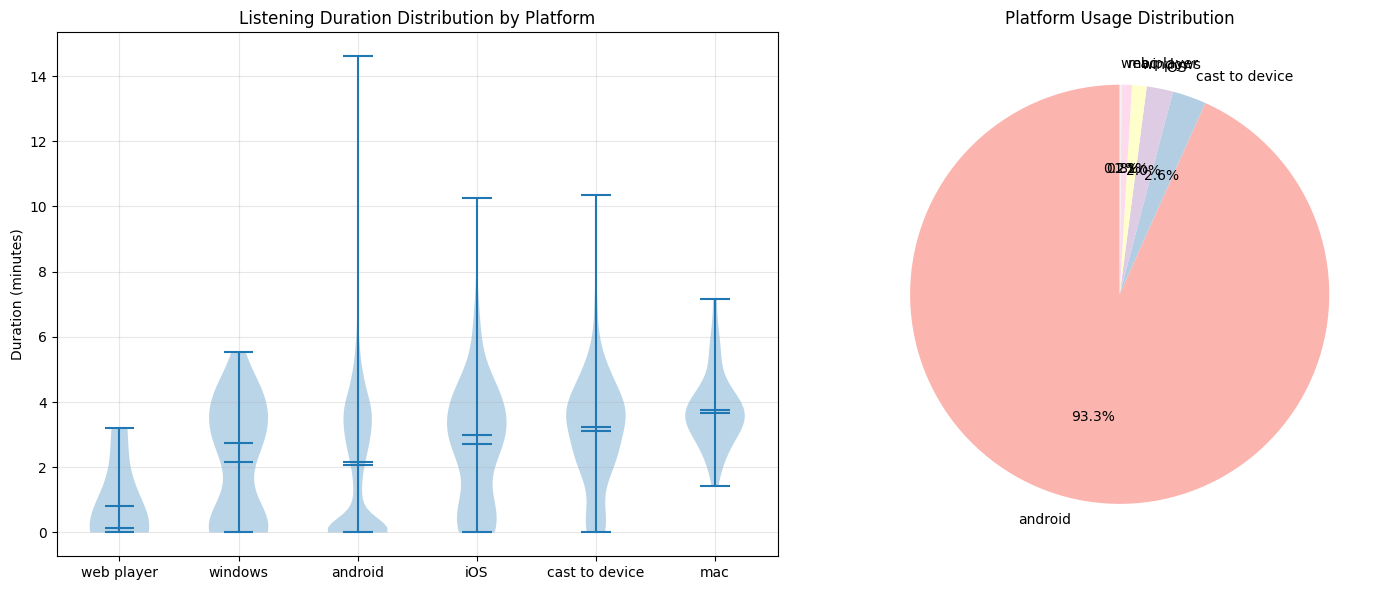

In [233]:
# Platform usage and listening duration analysis
platform_stats = df.groupby('platform').agg({
    'ms_played': ['count', 'mean'],
    'spotify_track_uri': 'count'
}).round(2)

platform_stats.columns = ['Track Count', 'Avg Duration (ms)', 'Total Plays']
platform_stats['Avg Duration (min)'] = platform_stats['Avg Duration (ms)'] / 1000 / 60

# Create violin plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Violin plot for duration distribution
df_sample = df.sample(n=min(5000, len(df)))  # Sample for performance
parts = ax1.violinplot([df_sample[df_sample['platform'] == p]['ms_played'].values/1000/60 
                       for p in df['platform'].unique()], 
                      positions=range(len(df['platform'].unique())), 
                      showmeans=True, showmedians=True)
ax1.set_xticks(range(len(df['platform'].unique())))
ax1.set_xticklabels(df['platform'].unique())
ax1.set_ylabel('Duration (minutes)')
ax1.set_title('Listening Duration Distribution by Platform')
ax1.grid(True, alpha=0.3)

# Pie chart for platform usage
platform_counts = df['platform'].value_counts()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(platform_counts)))
ax2.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Platform Usage Distribution')

plt.tight_layout()
plt.show()

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [235]:
# 2. List of columns to drop (only if they exist)
drop_cols = ["ts",'spotify_track_uri',  'track_name', 'artist_name', 'album_name']
spotify_data.drop(columns=[col for col in drop_cols if col in spotify_data.columns], inplace=True)

# 3. Drop missing values (optional - check if needed)
spotify_data.dropna(inplace=True)
# 4. Label encode categorical columns
le = LabelEncoder()
for col in ['platform', 'reason_start', 'reason_end']:
    if col in spotify_data.columns:
        spotify_data[col] = le.fit_transform(spotify_data[col])

# 5. Feature and Target
X = spotify_data.drop('skipped', axis=1)
y = spotify_data['skipped']

# 6.Train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
#Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [238]:
# Train and Evaluate 
print("Model Accuracies (%):\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: {acc:.2f}%")


Model Accuracies (%):

Logistic Regression: 94.77%
Decision Tree: 93.47%
Random Forest: 93.45%
Naive Bayes: 94.78%
Support Vector Machine: 94.78%
K-Nearest Neighbors: 95.02%


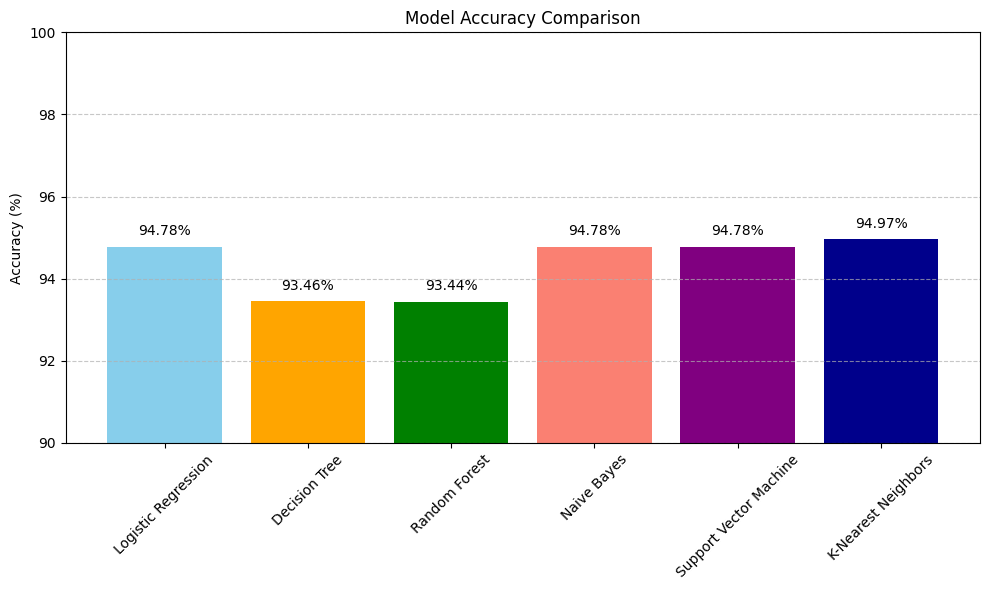

In [239]:
# Accuracy values
accuracies = {
    'Logistic Regression': 94.78,
    'Decision Tree': 93.46,
    'Random Forest': 93.44,
    'Naive Bayes': 94.78,
    'Support Vector Machine': 94.78,
    'K-Nearest Neighbors': 94.97
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green', 'salmon', 'purple', 'darkblue'])

# Labels and formatting
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(90, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on bars
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.2, f"{acc:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()